<h1 style="text-align:center">Household Power Consumption</h1>

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Ingestion

In [3]:
df = pd.read_csv("data\household_power_consumption.txt",sep=";")

C:\Users\abc\AppData\Local\Temp\ipykernel_9976\340530502.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data\household_power_consumption.txt",sep=";")


# EDA (Exploratory Data Ananlysis)

In [4]:
df.shape

(2075259, 9)

Around 20 Lakh instances in datasets and 9 features

### Data Samples

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Information about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Feature information

* date: Date in format dd/mm/yyyy
* time: time in format hh:mm:ss
* global_active_power: household global minute-averaged active power (in kilowatt)
* global_reactive_power: household global minute-averaged reactive power (in kilowatt)
* voltage: minute-averaged voltage (in volt)
* global_intensity: household global minute-averaged current intensity (in ampere)
* sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
* sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
* sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Checking null values

In [7]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

We have null values in Sub_metering_3 feature

### Checking Data Types of Features

In [17]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
month                      int64
dtype: object

All the columns are of object type so need to coneverted into numerical as per values

In [18]:
### Taking Samples from data
df = df.sample(50000)
df.shape

(50000, 10)

### Handling Missing Values

In [26]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
month                    0
total_metering           0
dtype: int64

In [27]:
df["Sub_metering_3"].fillna(0,inplace=True)

In [28]:
cols = df.columns
cols

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'month', 'total_metering'],
      dtype='object')

In [29]:
#Converting data types of columns
for col in cols[2:]:
    df[col] = df[col].replace("?","0")
    df[col] = df[col].astype("float64")

### Creating new feature

In [30]:
##Creating month feature as it can effect the consumtion rate of electricity
df["month"] = pd.to_datetime(df["Date"],infer_datetime_format=True).dt.month

In [31]:
### Creating total metering feature
df["total_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

### Numerical and Categorical Features

In [34]:
cat_feature = []
num_feature = []
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        num_feature.append(col)
    elif df[col].dtype == "O":
        cat_feature.append(col)

In [35]:
print(f"Categorical features in dataset {cat_feature}")
print(f"Numerical features in dataset {num_feature}")

Categorical features in dataset ['Date', 'Time']
Numerical features in dataset ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'month', 'total_metering']


## Univariate Analysis

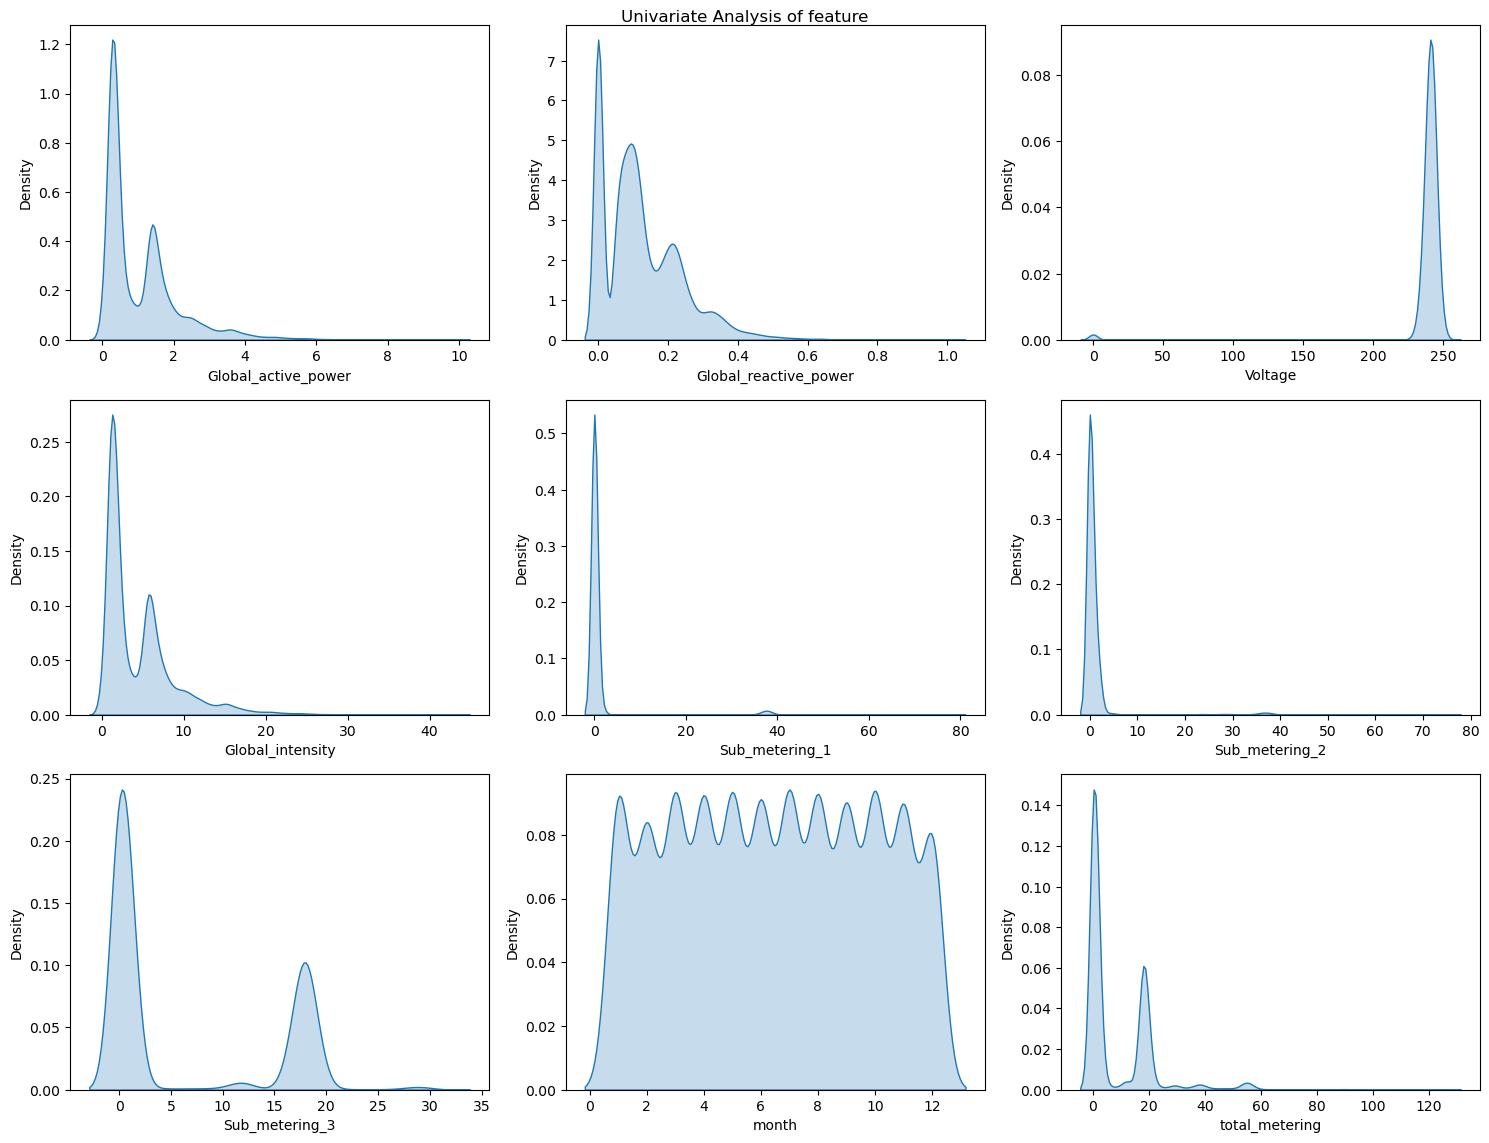

In [36]:
## Plotting KDE plot to see the distributions of the numerial features
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],shade=True)
    plt.xlabel(num_feature[i])
    plt.ylabel("Density")
    plt.tight_layout()

All the features are skewed means all of them contains outliers except month

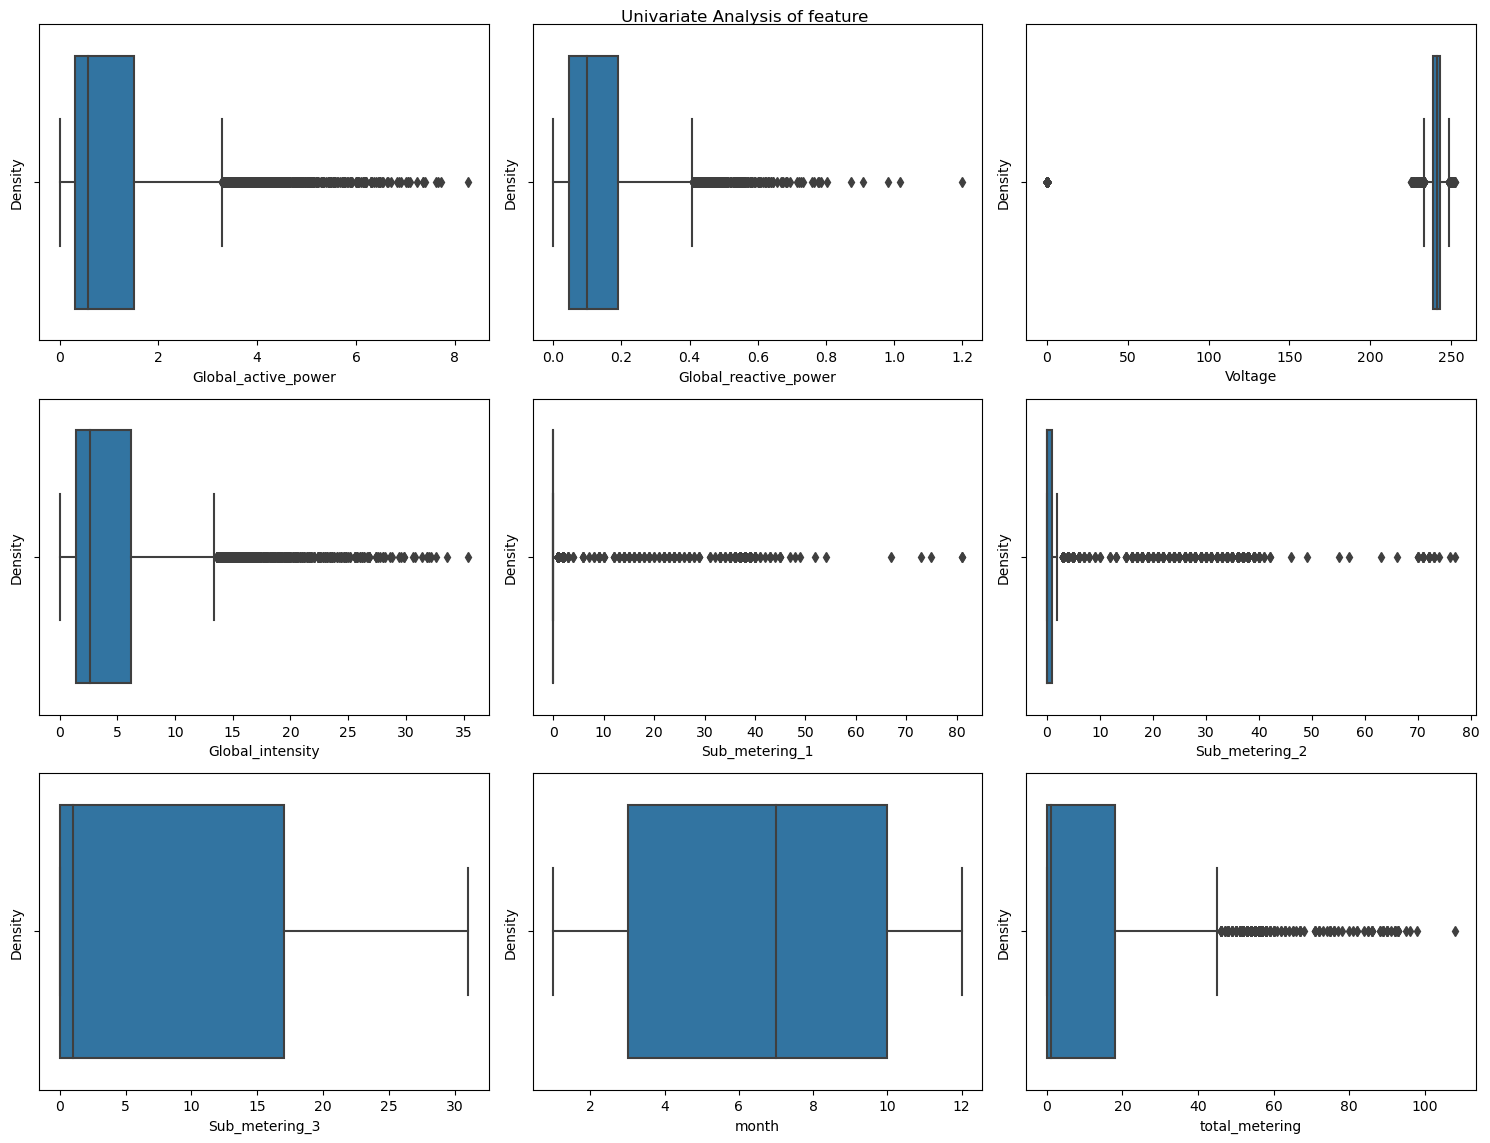

In [19]:
## plotting box plot to check outliers
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[num_feature[i]])
    plt.xlabel(num_feature[i])
    plt.ylabel("Density")
    plt.tight_layout()

Excet Sub_metering3 and month all of the data contains outliers

### We will keep the outliers as may be they required

## Bivariate Analysis of Dataset

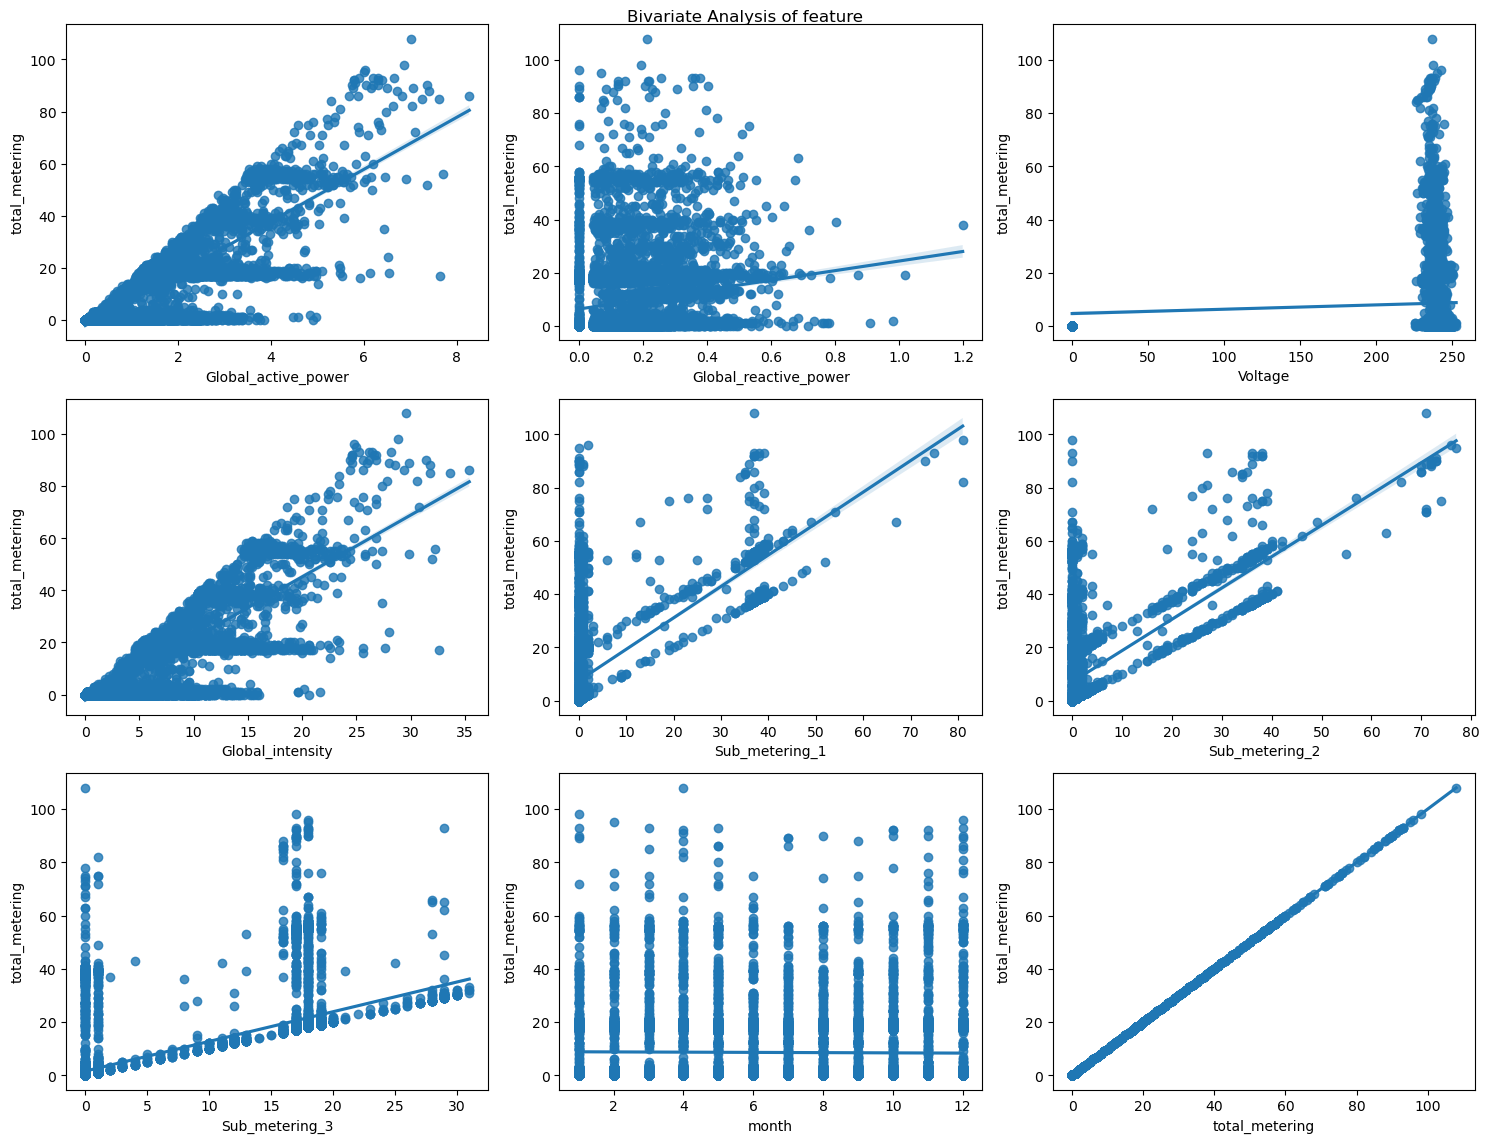

In [20]:
plt.figure(figsize=(15,15))
plt.suptitle("Bivariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.regplot(data=df,x=num_feature[i],y='total_metering')
    plt.xlabel(num_feature[i])
    plt.ylabel('total_metering')
    plt.tight_layout()

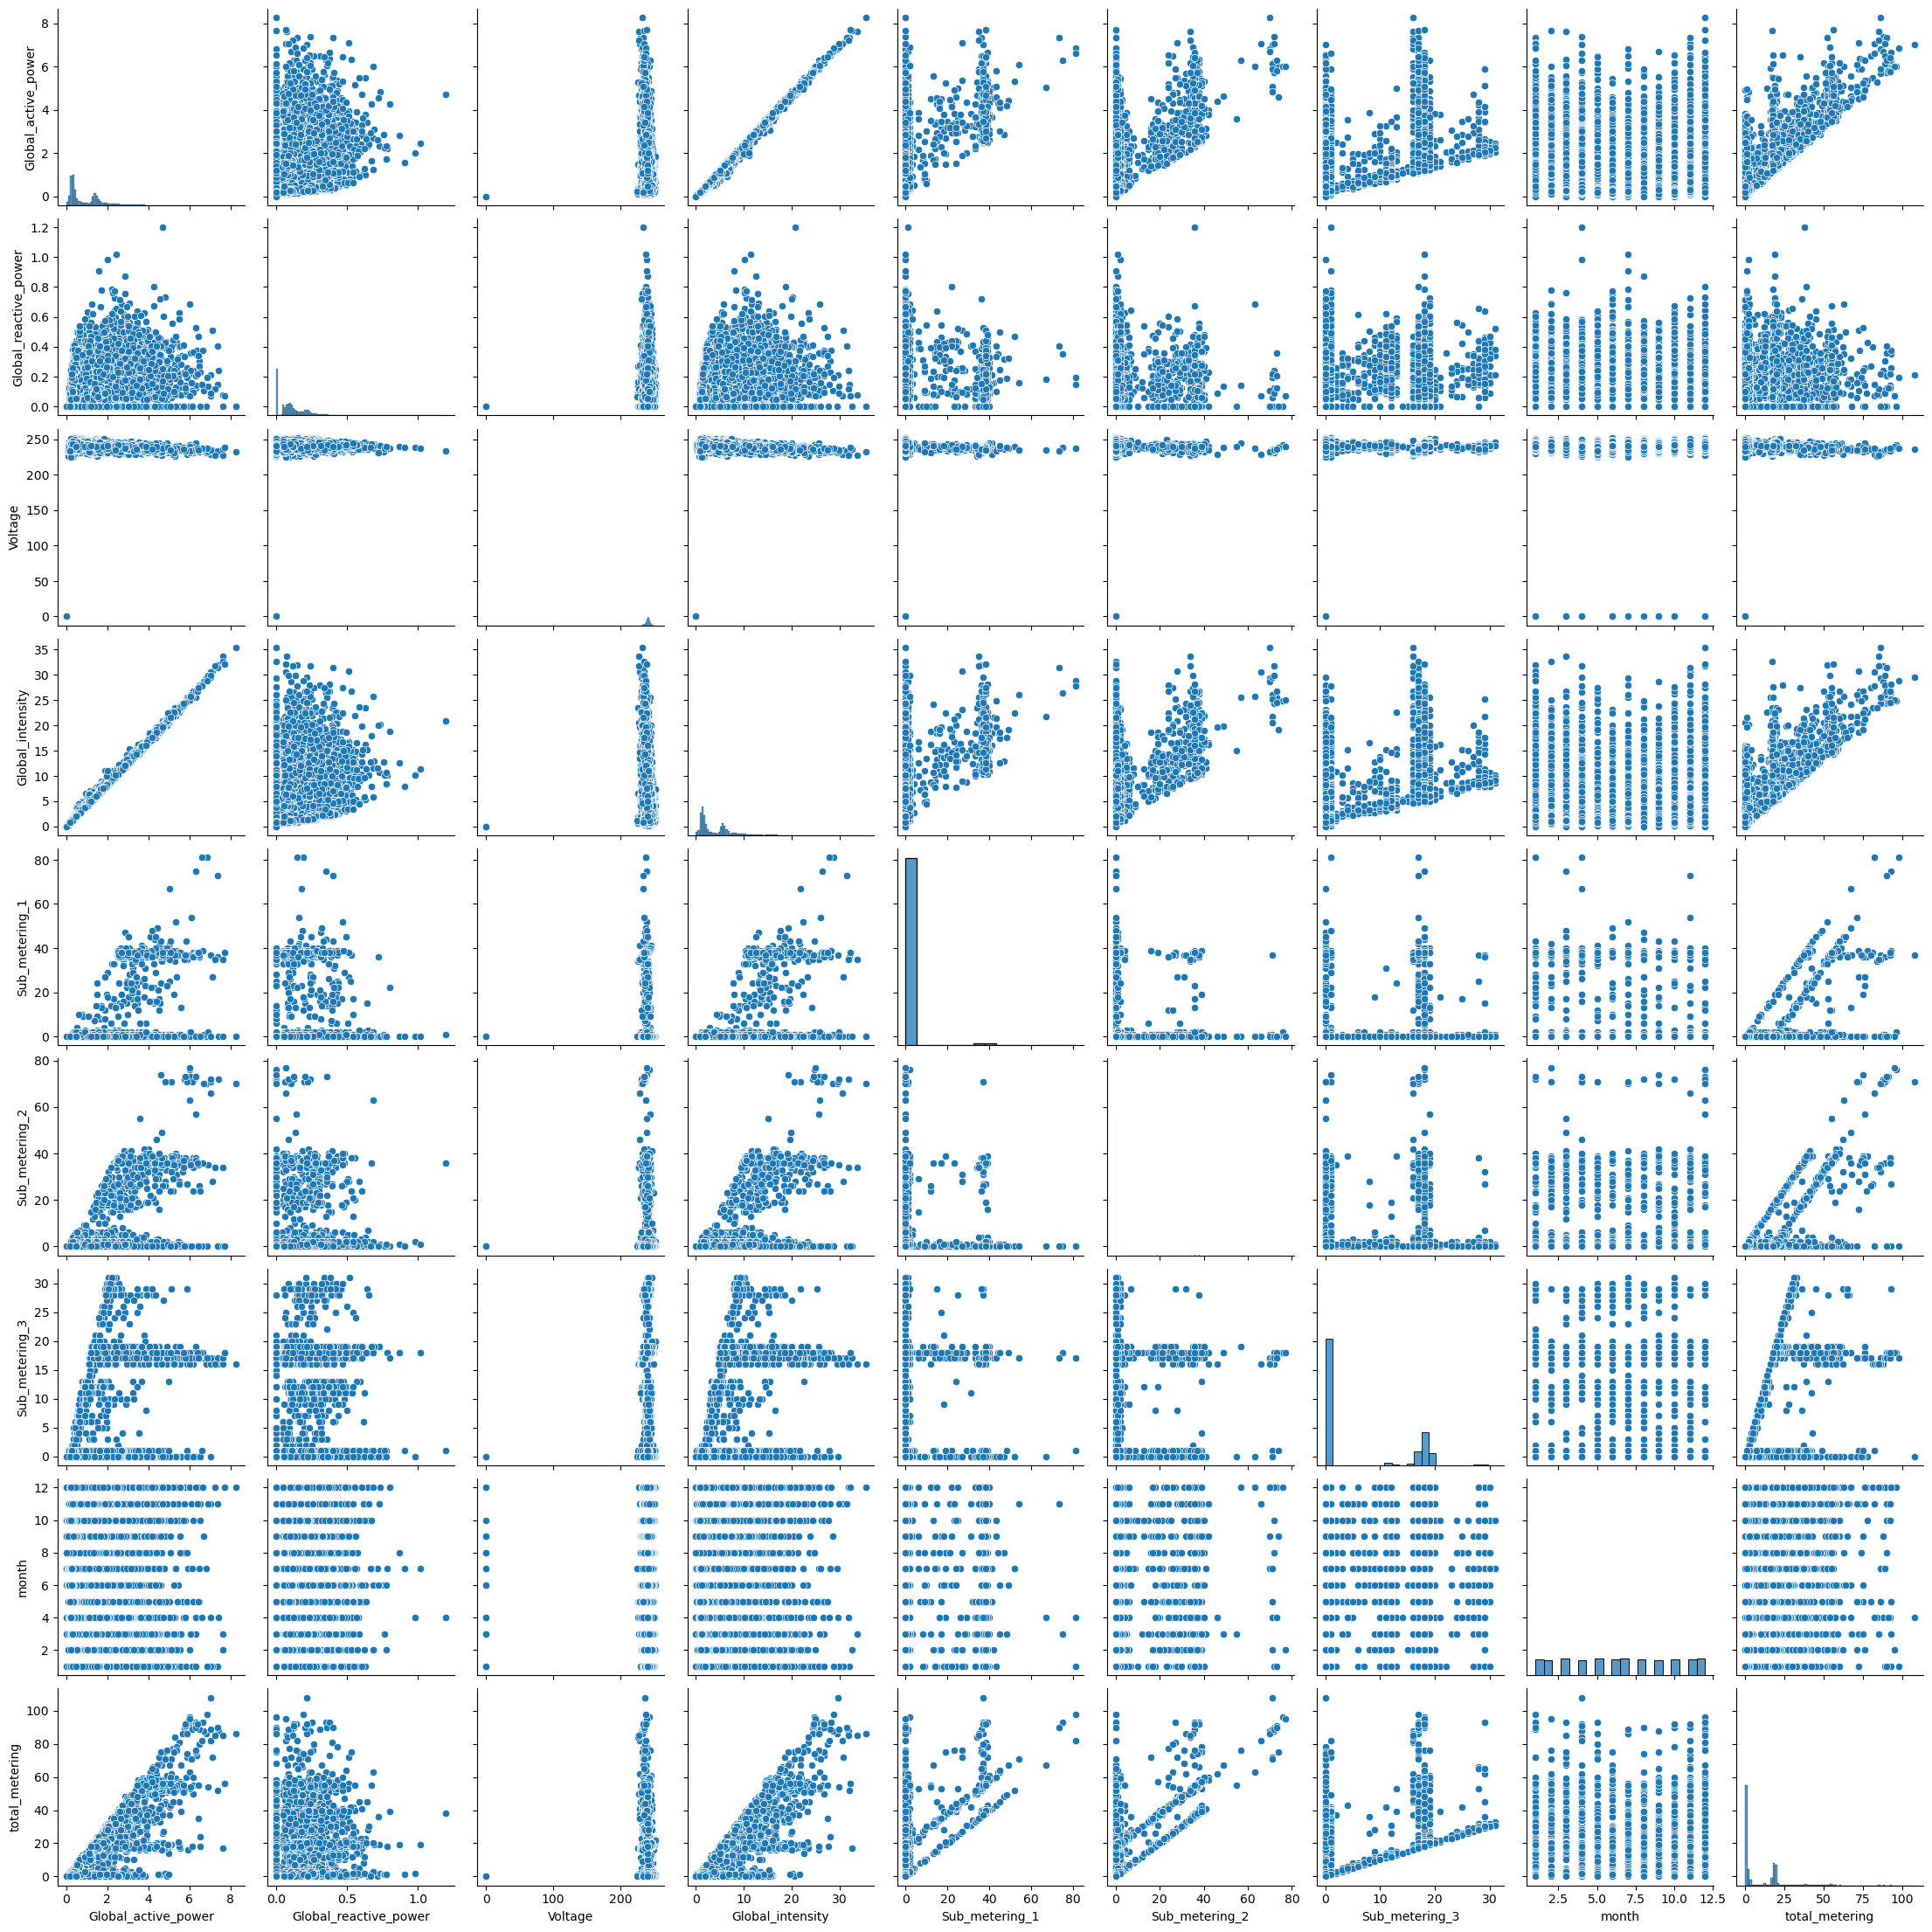

In [21]:
sns.pairplot(data=df)

## Multivariate Analysis of Dataset

<AxesSubplot:>

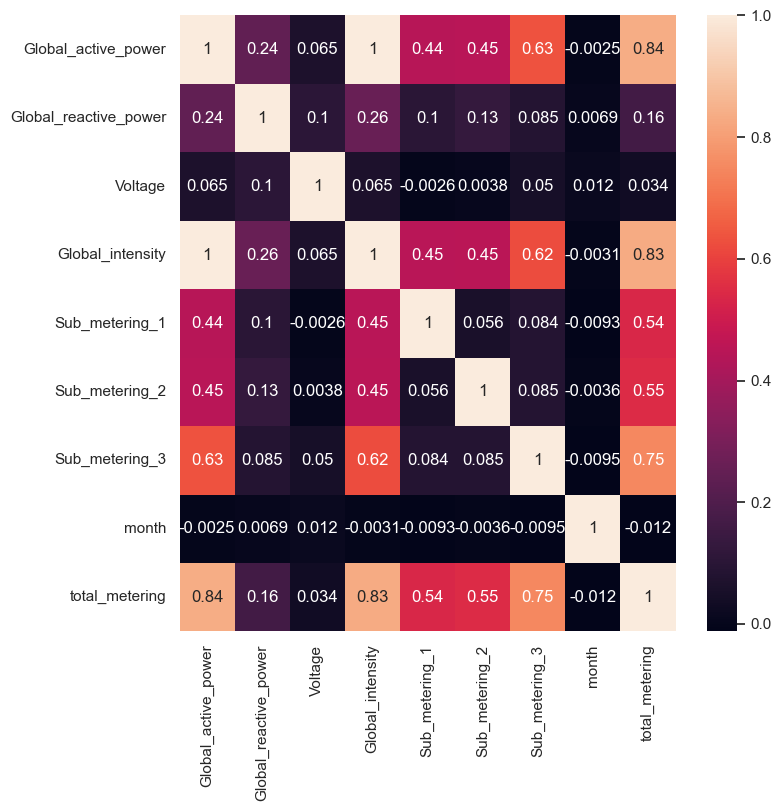

In [22]:
sns.set(rc={"figure.figsize":(8,8)})
sns.heatmap(df.corr(),annot=True)

### Dropping features which are not required

In [39]:
df.drop(["Date","Time","Sub_metering_1","Sub_metering_2","Sub_metering_3"],axis=1,inplace=True)

## Separating independent and dependent features

In [40]:
## Independent features
X = df.drop(["total_metering"],axis=1)
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,month
129464,0.234,0.000,244.03,1.0,3
1236462,0.382,0.126,240.88,1.6,4
1322277,0.348,0.150,243.82,1.6,6
1893698,0.350,0.236,240.60,1.6,7
429452,0.728,0.316,240.78,3.2,10
...,...,...,...,...,...
1009288,2.262,0.120,242.30,9.4,11
913472,0.146,0.000,238.05,0.6,9
1139462,1.332,0.058,242.74,5.4,2
635389,0.644,0.094,241.52,2.6,3


In [41]:
## Dependent feature
y = df["total_metering"]
y

129464      0.0
1236462     2.0
1322277     1.0
1893698     2.0
429452      5.0
           ... 
1009288    21.0
913472      0.0
1139462     0.0
635389      0.0
1344447     3.0
Name: total_metering, Length: 50000, dtype: float64

## Splitting test and train Data

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.33)

## Standardizing the data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.30156738, -0.34241273, -0.09282589,  0.28865303,  1.32717867],
       [ 1.31510907,  0.13577378,  0.28581886,  1.23666243,  1.61840583],
       [ 0.18009422, -0.16530662, -0.10593579,  0.15322311,  0.16227003],
       ...,
       [-0.42157754, -1.08625841,  0.17322796, -0.43363985, -1.58509292],
       [-0.53545863,  0.68480273,  0.24301889, -0.52392646, -1.58509292],
       [-0.39880132, -1.08625841,  0.2009901 , -0.38849654,  1.61840583]])

## Model Training

In [46]:
## creating regression model and training it
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
bag_reg_model = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(x_train,y_train)

In [47]:
##standardization of test data
x_test = scaler.transform(x_test)
x_test

array([[ 0.44391874,  0.80877701, -0.04385656,  0.42408294, -0.12895712],
       [-0.67021791,  0.73793456,  0.17746939, -0.65935637,  0.74472435],
       [-0.77271089,  1.18069985,  0.11153431, -0.70449968,  0.45349719],
       ...,
       [-0.80118117,  0.11806317,  0.06179381, -0.79478629,  0.45349719],
       [-0.59619521,  2.04851981,  0.18440993, -0.52392646, -0.12895712],
       [-0.74613864, -0.67891435,  0.18556668, -0.74964298,  1.32717867]])

In [49]:
## testing of model
y_pred = bag_reg_model.predict(x_test)
y_pred

array([18.61317929,  1.06940375,  1.27585269, ...,  0.84111608,
        1.73599457, -0.11384896])

In [50]:
## checking accuracy by MSE,MAE,RMSE,R2 and ajusted R2 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("Mean square error: ",mean_squared_error(y_test,y_pred))
print("r2 score: ",r2_score(y_test,y_pred))

Mean absolute error:  3.122718112336022
Mean square error:  42.033786686600834
r2 score:  0.7433472283796039


In [51]:
#Adjusted R2 score
r2 = r2_score(y_test,y_pred)
N = x_train.shape[0] + x_test.shape[0]
P = x_train.shape[1]
adjusted_r2 = (1 - ((1-r2)*(N-1)))/(N-P-1)
print("Adjusted r2: ", adjusted_r2)

Adjusted r2:  -0.25665843757747303


In [52]:
bag_reg_model.score(x_train,y_train)

0.7500254223555464

Training accuracy and testing accuracy are very similar means model is good

Conclusion:R2 Score is 0.74 means which is good 
and Adjusted R2 score is -0.25 which is near to 0 which is also good
    